In [205]:
# use finta indicators to simulate them in a machine learning and see if they work
# bootstrapping?

In [20]:
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
from finta import TA
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [21]:
"""
Defining some constants for data mining
"""

NUM_DAYS = 10     # The number of days of historical data to retrieve
INTERVAL = '1d'     # Sample rate of historical data
symbol = 'AAPL'      # Symbol of the desired stock

# List of symbols for technical indicators
INDICATORS = ['SMA', 'SMM', 'SSMA', 'EMA', 'DEMA', 'TEMA', 'TRIMA', 'TRIX', 'VAMA', 'ER', 'KAMA', 'ZLEMA', 'WMA', 'HMA', 'EVWMA', 'VWAP', 'SMMA', 'FRAMA', 'MACD', 'PPO', 'VW_MACD', 'EV_MACD', 'MOM', 'ROC', 'RSI', 'IFT_RSI', 'TR', 'ATR', 'SAR', 'BBANDS', 'BBWIDTH', 'MOBO', 'PERCENT_B', 'KC', 'DO', 'DMI', 'ADX', 'PIVOT', 'PIVOT_FIB', 'STOCH', 'STOCHD', 'STOCHRSI', 'WILLIAMS', 'UO', 'AO', 'MI', 'VORTEX', 'KST', 'TSI', 'TP', 'ADL', 'CHAIKIN', 'MFI', 'OBV', 'WOBV', 'VZO', 'PZO', 'EFI', 'CFI', 'EBBP', 'EMV', 'CCI', 'COPP', 'BASP', 'BASPN', 'CMO', 'CHANDELIER', 'QSTICK', 'WTO', 'FISH', 'ICHIMOKU', 'APZ', 'SQZMI', 'VPT', 'FVE', 'VFI', 'MSD', 'STC']
# INDICATORS = ['SMA','SMM','SSMA','EMA','DEMA','TEMA','TRIMA','TRIX','VAMA','ER','KAMA','ZLEMA','WMA','HMA','EVWMA','VWAP','SMMA','FRAMA','MACD','PPO','VW_MACD','EV_MACD','MOM','ROC','RSI','IFT_RSI','TR','ATR','SAR','BBANDS','BBWIDTH','MOBO','PERCENT_B','KC','DO','DMI','ADX','PIVOT','PIVOT_FIB','STOCH','STOCHD','STOCHRSI','WILLIAMS','UO','AO','MI','VORTEX','KST','TSI','TP','ADL','CHAIKIN','MFI','OBV','WOBV','VZO','PZO','EFI','CFI','EBBP','EMV','CCI','COPP','BASP','BASPN','CMO','CHANDELIER','QSTICK','TMF','WTO','FISH','ICHIMOKU','APZ','SQZMI','VPT','FVE','VFI','MSD','STC','WAVEPM']
# 'WACEPM', 'TMF'

[*********************100%***********************]  1 of 1 completed
                  open        high         low       close   Adj Close  \
Date                                                                     
2022-09-26  149.660004  153.770004  149.639999  150.770004  150.770004   
2022-09-27  152.740005  154.720001  149.949997  151.759995  151.759995   
2022-09-28  147.639999  150.639999  144.839996  149.839996  149.839996   
2022-09-29  146.100006  146.720001  140.679993  142.479996  142.479996   
2022-09-30  141.279999  143.100006  138.000000  138.199997  138.199997   

               volume  
Date                   
2022-09-26   93339400  
2022-09-27   84442700  
2022-09-28  146691400  
2022-09-29  128138200  
2022-09-30  124705400  


<AxesSubplot:xlabel='Date'>

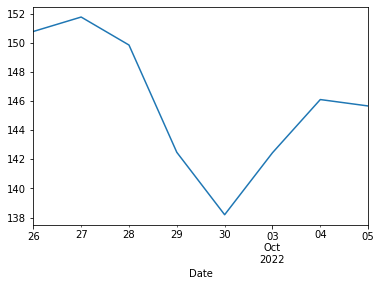

In [22]:
"""
Next we pull the historical data using yfinance
Rename the column names because finta uses the lowercase names
"""

start = (datetime.date.today() - datetime.timedelta( NUM_DAYS ) )
end = datetime.datetime.today()

data = yf.download(symbol, start=start, end=end, interval=INTERVAL)
data.rename(columns={"Close": 'close', "High": 'high', "Low": 'low', 'Volume': 'volume', 'Open': 'open'}, inplace=True)
print(data.head())

tmp = data.iloc[-60:]
tmp['close'].plot()

<AxesSubplot:xlabel='Date'>

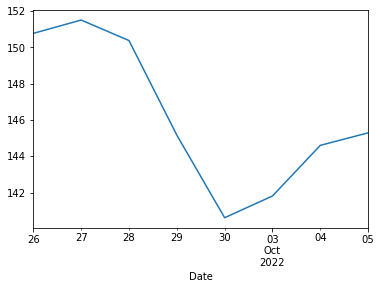

In [23]:
"""
Next we clean our data and perform feature engineering to create new technical indicator features that our
model can learn from
"""

def _exponential_smooth(data, alpha):
    """
    Function that exponentially smooths dataset so values are less 'rigid'
    :param alpha: weight factor to weight recent values more
    """
    
    return data.ewm(alpha=alpha).mean()

data = _exponential_smooth(data, 0.65)

tmp1 = data.iloc[-60:]
tmp1['close'].plot()

In [24]:
ind_data = [('TA.' + i + '(data)') for i in INDICATORS]

df = pd.DataFrame(eval(ind_data[0]))

for i in ind_data[1:]:
    try:
        df[i] = eval(i)
        
    except:
        df[i] = eval(i).iloc[:,0]
    

In [33]:
len(df[df.columns[df.isna().any()]].columns)

52

In [34]:
len(df.columns)

78

In [35]:
df

,41 period SMA,TA.SMM(data),TA.SSMA(data),TA.EMA(data),TA.DEMA(data),TA.TEMA(data),TA.TRIMA(data),TA.TRIX(data),TA.VAMA(data),TA.ER(data),...,TA.WTO(data),TA.FISH(data),TA.ICHIMOKU(data),TA.APZ(data),TA.SQZMI(data),TA.VPT(data),TA.FVE(data),TA.VFI(data),TA.MSD(data),TA.STC(data)
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-26,NaN,NaN,150.770004,150.770004,150.770004,150.770004,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,159.030014,False,5.017272e+07,NaN,NaN,NaN,NaN
2022-09-27,NaN,NaN,151.158236,151.177408,151.358476,151.438951,NaN,0.070332,NaN,NaN,...,121.212121,0.0,NaN,159.857202,False,3.366140e+07,NaN,NaN,NaN,NaN
2022-09-28,NaN,NaN,150.865402,150.848032,150.760507,150.649486,NaN,0.014070,NaN,NaN,...,-17.143406,0.0,NaN,159.687918,False,9.736147e+07,NaN,NaN,NaN,NaN
2022-09-29,NaN,NaN,149.179455,148.922762,147.591807,146.696182,NaN,-0.087647,NaN,NaN,...,-66.348127,0.0,NaN,157.261009,False,1.270835e+07,NaN,NaN,NaN,NaN
2022-09-30,NaN,NaN,147.041036,146.451009,143.779521,142.208569,NaN,-0.180644,NaN,NaN,...,-85.201591,0.0,NaN,154.159656,False,-1.133328e+08,NaN,NaN,NaN,NaN
2022-10-03,NaN,NaN,145.893911,145.192901,142.328445,141.042644,NaN,-0.227178,NaN,NaN,...,-86.784882,0.0,NaN,152.860822,False,-3.287084e+07,NaN,NaN,NaN,NaN
2022-10-04,NaN,NaN,145.637910,145.042885,142.791295,142.288663,NaN,-0.235710,NaN,NaN,...,-74.572622,0.0,NaN,152.892481,False,5.043484e+07,NaN,NaN,NaN,NaN
2022-10-05,NaN,NaN,145.574420,145.102079,143.436557,143.499942,NaN,-0.227450,NaN,NaN,...,-62.908594,0.0,NaN,153.072774,False,1.120975e+08,NaN,NaN,NaN,NaN


In [ ]:
data = []
for i, in INDICATORS, ind_data:
    data.append({'value': row["tag_expression"], 'key': row["tag_name"]})

In [139]:
def _get_indicator_data(data):
    """
    Function that uses the finta API to calculate technical indicators used as the features
    :return:
    """
    print('STARTING')
    for indicator in INDICATORS:
        print(indicator)
        try:
            ind_data = eval('TA.' + indicator + '(data)')
            
            if not isinstance(ind_data, pd.DataFrame):
                ind_data = ind_data.to_frame()
            data = data.merge(ind_data, left_index=True, right_index=True)
#         data.rename(columns={"14 period EMV.": '14 period EMV'}, inplace=True)
        except:
            print('error' + indicator)
#             print(indicator + 'error')
#             print('TA.' + indicator + '(data)')
#         Also calculate moving averages for features
#     data['ema50'] = data['close'] / data['close'].ewm(50).mean()
#     data['ema21'] = data['close'] / data['close'].ewm(21).mean()
#     data['ema15'] = data['close'] / data['close'].ewm(14).mean()
#     data['ema5'] = data['close'] / data['close'].ewm(5).mean()

    # Instead of using the actual volume value (which changes over time), we normalize it with a moving volume average
#     data['normVol'] = data['volume'] / data['volume'].ewm(5).mean()

    # Remove columns that won't be used as features
#     del (data['open'])
#     del (data['high'])
#     del (data['low'])
#     del (data['volume'])
#     del (data['Adj Close'])
        
    
    return data

data = _get_indicator_data(data)
print(data.columns)

STARTING
SMA
SMM
SSMA
EMA
DEMA
TEMA
TRIMA
TRIX
VAMA
ER
KAMA
ZLEMA
WMA
HMA
EVWMA
VWAP
SMMA
FRAMA
MACD
PPO
VW_MACD
EV_MACD
MOM
ROC
RSI
IFT_RSI
TR
ATR
SAR
BBANDS
errorBBANDS
BBWIDTH
errorBBWIDTH
MOBO
errorMOBO
PERCENT_B
errorPERCENT_B
KC
errorKC
DO
errorDO
DMI
errorDMI
ADX
errorADX
PIVOT
errorPIVOT
PIVOT_FIB
errorPIVOT_FIB
STOCH
errorSTOCH
STOCHD
errorSTOCHD
STOCHRSI
errorSTOCHRSI
WILLIAMS
errorWILLIAMS
UO
errorUO
AO
errorAO
MI
errorMI
VORTEX
errorVORTEX
KST
errorKST
TSI
errorTSI
TP
errorTP
ADL
errorADL
CHAIKIN
errorCHAIKIN
MFI
errorMFI
OBV
errorOBV
WOBV
errorWOBV
VZO
errorVZO
PZO
errorPZO
EFI
errorEFI
CFI
errorCFI
EBBP
errorEBBP
EMV
errorEMV
CCI
errorCCI
COPP
errorCOPP
BASP
errorBASP
BASPN
errorBASPN
CMO
errorCMO
CHANDELIER
errorCHANDELIER
QSTICK
errorQSTICK
WTO
errorWTO
FISH
errorFISH
ICHIMOKU
errorICHIMOKU
APZ
errorAPZ
SQZMI
errorSQZMI
VPT
errorVPT
FVE
errorFVE
VFI
errorVFI
MSD
errorMSD
STC
errorSTC
Index([            'open',             'high',              'low',
                  'c

In [51]:
data.columns

Index([           'close',    '41 period SMA',     '9 period SMM',
          '9 period SSMA',     '9 period EMA',    '9 period DEMA',
          '9 period TEMA',  '18 period TRIMA',   '20 period TRIX',
          '8 period VAMA',     '10 period ER',  '20 period KAMA.',
        '26 period ZLEMA',    '9 period WMA.',   '16 period HMA.',
       '20 period EVWMA.',            'VWAP.',             'SMMA',
       '16 period FRAMA.',           'MACD_x',         'SIGNAL_x',
                    'PPO',         'SIGNAL_y',            'HISTO',
                 'MACD_y',         'SIGNAL_x',             'MACD',
               'SIGNAL_y',              'MOM',              'ROC',
          '14 period RSI',          'IFT_RSI',               'TR',
          '14 period ATR',                  0,            'ema50',
                  'ema21',            'ema15',             'ema5',
                'normVol'],
      dtype='object')

In [ ]:
def _produce_prediction(data, window):
    """
    Function that produces the 'truth' values
    At a given row, it looks 'window' rows ahead to see if the price increased (1) or decreased (0)
    :param window: number of days, or rows to look ahead to see what the price did
    """
    
    prediction = (data.shift(-window)['close'] >= data['close'])
    prediction = prediction.iloc[:-window]
    data['pred'] = prediction.astype(int)
    
    return data

data = _produce_prediction(data, window=15)
del (data['close'])
data = data.dropna() # Some indicators produce NaN values for the first few rows, we just remove them here
data

In [ ]:
def _train_random_forest(X_train, y_train, X_test, y_test):

    """
    Function that uses random forest classifier to train the model
    :return:
    """
    
    # Create a new random forest classifier
    rf = RandomForestClassifier()
    
    # Dictionary of all values we want to test for n_estimators
    params_rf = {'n_estimators': [110,130,140,150,160,180,200]}
    
    # Use gridsearch to test all values for n_estimators
    rf_gs = GridSearchCV(rf, params_rf, cv=5)
    
    # Fit model to training data
    rf_gs.fit(X_train, y_train)
    
    # Save best model
    rf_best = rf_gs.best_estimator_
    
    # Check best n_estimators value
    print(rf_gs.best_params_)
    
    prediction = rf_best.predict(X_test)

    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    return rf_best
    
rf_model = _train_random_forest(X_train, y_train, X_test, y_test)

In [ ]:
def _ensemble_model(rf_model, knn_model, gbt_model, X_train, y_train, X_test, y_test):
    
    # Create a dictionary of our models
    estimators=[('knn', knn_model), ('rf', rf_model), ('gbt', gbt_model)]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard')
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    #test our model on the test data
    print(ensemble.score(X_test, y_test))
    
    prediction = ensemble.predict(X_test)

    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    return ensemble
    
ensemble_model = _ensemble_model(rf_model, knn_model, gbt_model, X_train, y_train, X_test, y_test)

In [ ]:
def cross_Validation(data):

    # Split data into equal partitions of size len_train
    
    num_train = 10 # Increment of how many starting points (len(data) / num_train  =  number of train-test sets)
    len_train = 40 # Length of each train-test set
    
    # Lists to store the results from each model
    rf_RESULTS = []
    knn_RESULTS = []
    ensemble_RESULTS = []
    
    i = 0
    while True:
        
        # Partition the data into chunks of size len_train every num_train days
        df = data.iloc[i * num_train : (i * num_train) + len_train]
        i += 1
        print(i * num_train, (i * num_train) + len_train)
        
        if len(df) < 40:
            break

In [ ]:
def cross_Validation(data):

    # Split data into equal partitions of size len_train
    
    num_train = 10 # Increment of how many starting points (len(data) / num_train  =  number of train-test sets)
    len_train = 40 # Length of each train-test set
    
    # Lists to store the results from each model
    rf_RESULTS = []
    knn_RESULTS = []
    ensemble_RESULTS = []
    
    i = 0
    while True:
        
        # Partition the data into chunks of size len_train every num_train days
        df = data.iloc[i * num_train : (i * num_train) + len_train]
        i += 1
        print(i * num_train, (i * num_train) + len_train)
        
        if len(df) < 40:
            break
        
        y = df['pred']
        features = [x for x in df.columns if x not in ['pred']]
        X = df[features]

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 7 * len(X) // 10,shuffle=False)

In [ ]:
def cross_Validation(data):

    # Split data into equal partitions of size len_train
    
    num_train = 10 # Increment of how many starting points (len(data) / num_train  =  number of train-test sets)
    len_train = 40 # Length of each train-test set
    
    # Lists to store the results from each model
    rf_RESULTS = []
    knn_RESULTS = []
    ensemble_RESULTS = []
    
    i = 0
    while True:
        
        # Partition the data into chunks of size len_train every num_train days
        df = data.iloc[i * num_train : (i * num_train) + len_train]
        i += 1
        print(i * num_train, (i * num_train) + len_train)
        
        if len(df) < 40:
            break
        
        y = df['pred']
        features = [x for x in df.columns if x not in ['pred']]
        X = df[features]

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 7 * len(X) // 10,shuffle=False)
        
        rf_model = _train_random_forest(X_train, y_train, X_test, y_test)
        knn_model = _train_KNN(X_train, y_train, X_test, y_test)
        ensemble_model = _ensemble_model(rf_model, knn_model, X_train, y_train, X_test, y_test)
        
        rf_prediction = rf_model.predict(X_test)
        knn_prediction = knn_model.predict(X_test)
        ensemble_prediction = ensemble_model.predict(X_test)
        
        print('rf prediction is ', rf_prediction)
        print('knn prediction is ', knn_prediction)
        print('ensemble prediction is ', ensemble_prediction)
        print('truth values are ', y_test.values)
        
        rf_accuracy = accuracy_score(y_test.values, rf_prediction)
        knn_accuracy = accuracy_score(y_test.values, knn_prediction)
        ensemble_accuracy = accuracy_score(y_test.values, ensemble_prediction)
        
        print(rf_accuracy, knn_accuracy, ensemble_accuracy)
        rf_RESULTS.append(rf_accuracy)
        knn_RESULTS.append(knn_accuracy)
        ensemble_RESULTS.append(ensemble_accuracy)
        
        
    print('RF Accuracy = ' + str( sum(rf_RESULTS) / len(rf_RESULTS)))
    print('KNN Accuracy = ' + str( sum(knn_RESULTS) / len(knn_RESULTS)))
    print('Ensemble Accuracy = ' + str( sum(ensemble_RESULTS) / len(ensemble_RESULTS)))
    
    
cross_Validation(data)

In [ ]:
import re

In [ ]:
a = """* Simple Moving Average 'SMA'
* Simple Moving Median 'SMM'
* Smoothed Simple Moving Average 'SSMA'
* Exponential Moving Average 'EMA'
* Double Exponential Moving Average 'DEMA'
* Triple Exponential Moving Average 'TEMA'
* Triangular Moving Average 'TRIMA'
* Triple Exponential Moving Average Oscillator 'TRIX'
* Volume Adjusted Moving Average 'VAMA'
* Kaufman Efficiency Indicator 'ER'
* Kaufman's Adaptive Moving Average 'KAMA'
* Zero Lag Exponential Moving Average 'ZLEMA'
* Weighted Moving Average 'WMA'
* Hull Moving Average 'HMA'
* Elastic Volume Moving Average 'EVWMA'
* Volume Weighted Average Price 'VWAP'
* Smoothed Moving Average 'SMMA'
* Fractal Adaptive Moving Average 'FRAMA'
* Moving Average Convergence Divergence 'MACD'
* Percentage Price Oscillator 'PPO'
* Volume-Weighted MACD 'VW_MACD'
* Elastic-Volume weighted MACD 'EV_MACD'
* Market Momentum 'MOM'
* Rate-of-Change 'ROC'
* Relative Strenght Index 'RSI'
* Inverse Fisher Transform RSI 'IFT_RSI'
* True Range 'TR'
* Average True Range 'ATR'
* Stop-and-Reverse 'SAR'
* Bollinger Bands 'BBANDS'
* Bollinger Bands Width 'BBWIDTH'
* Momentum Breakout Bands 'MOBO'
* Percent B 'PERCENT_B'
* Keltner Channels 'KC'
* Donchian Channel 'DO'
* Directional Movement Indicator 'DMI'
* Average Directional Index 'ADX'
* Pivot Points 'PIVOT'
* Fibonacci Pivot Points 'PIVOT_FIB'
* Stochastic Oscillator %K 'STOCH'
* Stochastic oscillator %D 'STOCHD'
* Stochastic RSI 'STOCHRSI'
* Williams %R 'WILLIAMS'
* Ultimate Oscillator 'UO'
* Awesome Oscillator 'AO'
* Mass Index 'MI'
* Vortex Indicator 'VORTEX'
* Know Sure Thing 'KST'
* True Strength Index 'TSI'
* Typical Price 'TP'
* Accumulation-Distribution Line 'ADL'
* Chaikin Oscillator 'CHAIKIN'
* Money Flow Index 'MFI'
* On Balance Volume 'OBV'
* Weighter OBV 'WOBV'
* Volume Zone Oscillator 'VZO'
* Price Zone Oscillator 'PZO'
* Elder's Force Index 'EFI'
* Cummulative Force Index 'CFI'
* Bull power and Bear Power 'EBBP'
* Ease of Movement 'EMV'
* Commodity Channel Index 'CCI'
* Coppock Curve 'COPP'
* Buy and Sell Pressure 'BASP'
* Normalized BASP 'BASPN'
* Chande Momentum Oscillator 'CMO'
* Chandelier Exit 'CHANDELIER'
* Qstick 'QSTICK'
* Twiggs Money Index 'TMF'
* Wave Trend Oscillator 'WTO'
* Fisher Transform 'FISH'
* Ichimoku Cloud 'ICHIMOKU'
* Adaptive Price Zone 'APZ'
* Squeeze Momentum Indicator 'SQZMI'
* Volume Price Trend 'VPT'
* Finite Volume Element 'FVE'
* Volume Flow Indicator 'VFI'
* Moving Standard deviation 'MSD'
* Schaff Trend Cycle 'STC'
* Mark Whistler's WAVE PM 'WAVEPM'
"""

In [ ]:
a = re.findall(r"'(\w+)'", a)

In [ ]:
a

In [ ]:
INDICATORS = ['SMA','SMM','SSMA','EMA','DEMA','TEMA','TRIMA','TRIX','VAMA','ER','KAMA','ZLEMA','WMA','HMA','EVWMA','VWAP','SMMA','FRAMA','MACD','PPO','VW_MACD','EV_MACD','MOM','ROC','RSI','IFT_RSI','TR','ATR','SAR','BBANDS','BBWIDTH','MOBO','PERCENT_B','KC','DO','DMI','ADX','PIVOT','PIVOT_FIB','STOCH','STOCHD','STOCHRSI','WILLIAMS','UO','AO','MI','VORTEX','KST','TSI','TP','ADL','CHAIKIN','MFI','OBV','WOBV','VZO','PZO','EFI','CFI','EBBP','EMV','CCI','COPP','BASP','BASPN','CMO','CHANDELIER','QSTICK','TMF','WTO','FISH','ICHIMOKU','APZ','SQZMI','VPT','FVE','VFI','MSD','STC','WAVEPM']